In [124]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import japanize_matplotlib
import traceback
import random

In [125]:
random.seed(0)

In [3]:
df = pd.read_csv("exe11.csv")
print(df.head())

          x          y
0  0.100000  12.157121
1  0.506122  16.610557
2  0.912245  18.066837
3  1.318367  17.873933
4  1.724490  19.414218


Text(0, 0.5, 'y')

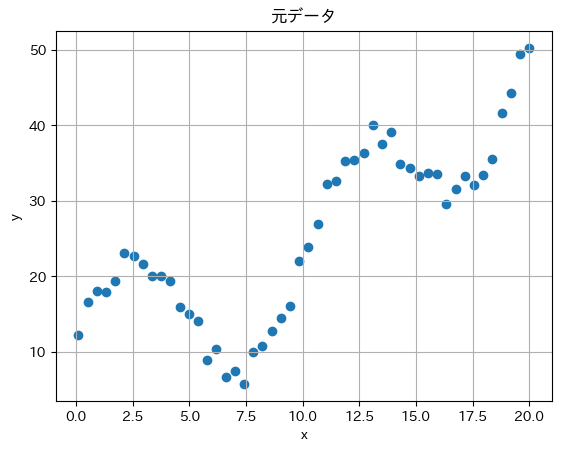

In [5]:
plt.scatter(df["x"], df["y"])
plt.grid()
plt.title("元データ")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
def get_grad(vec, loss_fn, h=0.001):
    grad = np.zeros_like(vec)
    for i in range(vec.shape[0]): # (1, 3) range(0, 3)
        original_element = vec[i]
        vec[i] = original_element + h
        foward_loss = loss_fn(vec)
        vec[i] = original_element - h
        back_loss = loss_fn(vec)

        grad[i]  = (foward_loss - back_loss) / (2 * h)
        vec[i] = original_element
        
    return grad

In [71]:
x = df["x"].to_numpy().reshape(-1, 1)
X = np.concatenate([x, x**2, np.ones_like(x)], axis=1)
X[:5]

array([[0.1       , 0.01      , 1.        ],
       [0.50612245, 0.25615993, 1.        ],
       [0.9122449 , 0.83219075, 1.        ],
       [1.31836735, 1.73809246, 1.        ],
       [1.7244898 , 2.97386506, 1.        ]])

In [ ]:
def get_mini_batch_indexes(data_len,  batch_size=10):
    """データのサイズを受け取り、バッチサイズごとにデータのインデックスを区切ったイテレータを返す。
    なお、各バッチで使用するインデックスは重複なく、網羅的に抽出する
    """
    try:
        if data_len % batch_size != 0:
              raise Exception("データサイズがバッチサイズで割り切れません")
    except:
        traceback.print_exc()


    iter_num = int(data_len / batch_size)
    mini_batch_indexies = np.full((iter_num, batch_size), None) # 最終的に返す値
    available_index = list(range(0, data_len)) # 使用可能なインデックスから各バッチで使用するインデックスを抽出する  

    for i in range(0, iter_num):
        mini_batch_index = np.array(random.sample(available_index, batch_size))
        available_index = list(filter(lambda x: x not in mini_batch_index, available_index)) # 使用可能なインデックスを更新
        mini_batch_indexies[i] = mini_batch_index # バッチインデックスを追加

    return mini_batch_indexies

In [95]:
def loss_fn(vec):
    X = df["x"].to_numpy().reshape(-1, 1)
    y = df["y"].to_numpy()

    y_hat = vec[0]  + vec[1]* np.sin(3.1416*X/5) + vec[2]* X
    mse = np.mean((y - y_hat.flatten())**2)
    return mse

In [113]:
epochs = 1000
best_η = None
best_w = np.ones(3)
η_scope = np.linspace(0.001, 0.01, 10)
min_loss = float("inf")

for η in η_scope:

    w = best_w

    for epoch in range(1, epochs + 1):
        grad = get_grad(w, loss_fn)
        w -= η * grad
        loss = loss_fn(w)

        if epoch % 100 == 0:
            print(f"epoch: {epoch}, loss : {loss}, grad: {grad.flatten()}")
        
        if np.sqrt(np.sum([g**2 for g in grad])) < 0.001:
            break

    loss = loss_fn(w)

    if loss < min_loss:
        min_loss = loss
        best_w = w
        best_η = η

epoch: 100, loss : 50.84549784005462, grad: [-3.74811976 -8.39045638  0.18233702]
epoch: 200, loss : 43.23654996384754, grad: [-3.38328337 -7.55128408  0.16484676]
epoch: 300, loss : 37.0673663285764, grad: [-3.05444453 -6.79582424  0.14907173]
epoch: 400, loss : 32.06548688056811, grad: [-2.75803172 -6.11573466  0.13484217]
epoch: 500, loss : 28.010013914987535, grad: [-2.49082857 -5.5035041   0.12200518]
epoch: 600, loss : 24.721853866604743, grad: [-2.2499385  -4.95236956  0.11042306]
epoch: 700, loss : 22.055805861582108, grad: [-2.0327529  -4.45624174  0.09997178]
epoch: 800, loss : 19.89414752580768, grad: [-1.83692247 -4.00963795  0.09053961]
epoch: 900, loss : 18.14143469026871, grad: [-1.66033142 -3.60762167  0.08202594]
epoch: 1000, loss : 16.720285260406193, grad: [-1.50107422 -3.24574818  0.07434012]
epoch: 100, loss : 14.632714990223628, grad: [-1.22897223 -2.62931212  0.0611871 ]
epoch: 200, loss : 13.260430439188694, grad: [-1.0063147  -2.12717071  0.05039794]
epoch: 300

In [114]:
print(f"best_w {best_w}, best_η {best_η}, min_loss {min_loss}")

best_w [5.26659597 9.77452919 2.00511993], best_η 0.01, min_loss 10.623253798941999


Text(0, 0.5, 'y')

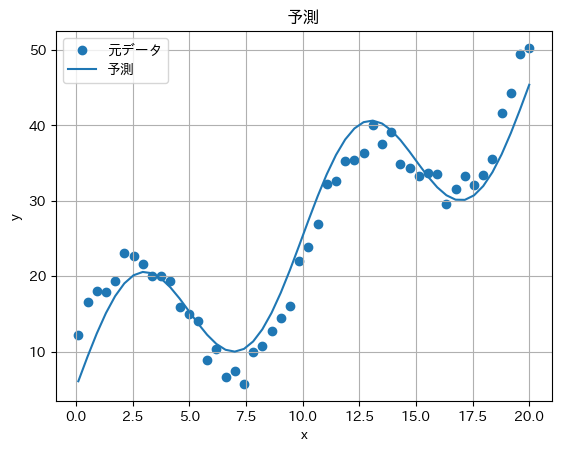

In [115]:
y_hat = w[0]  + w[1]* np.sin(3.1416*x/5) + w[2]* x

plt.scatter(df["x"], df["y"], label="元データ")
plt.plot(df["x"], y_hat, label="予測")
plt.grid()
plt.legend()
plt.title("予測")
plt.xlabel("x")
plt.ylabel("y")

## ミニバッチ学習(SGD)

epoch: 1, loss : 157.21414283064317, grad: [ -30.64175952  -14.33454633 -372.19266555], w : [1.03064176 1.01433455 1.37219267]
epoch: 1, loss : 116.03989780753382, grad: [ -16.94348816   -1.92102348 -202.58814805], w : [1.04758525 1.01625557 1.57478081]
epoch: 1, loss : 88.50132658257253, grad: [ -22.42167269  -11.54987027 -181.71875843], w : [1.07000692 1.02780544 1.75649957]
epoch: 1, loss : 77.1072428025948, grad: [  -8.94616524   -3.90650183 -101.81589933], w : [1.07895309 1.03171194 1.85831547]
epoch: 1, loss : 69.07125153903495, grad: [-13.80665401  -7.945386   -93.2888731 ], w : [1.09275974 1.03965733 1.95160434]
epoch: 2, loss : 65.96461463271434, grad: [ -4.71776596  -5.89494616 -46.50733481], w : [1.09747751 1.04555227 1.99811168]
epoch: 2, loss : 63.27757034559145, grad: [ -9.32460378  -9.10969174 -48.93790902], w : [1.10680211 1.05466197 2.04704959]
epoch: 2, loss : 59.75134426525946, grad: [ -10.58511767  -10.48672125 -113.78935145], w : [1.11738723 1.06514869 2.16083894]


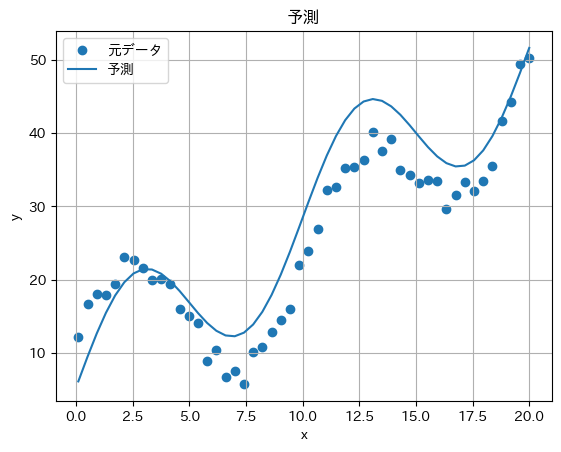

In [181]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import japanize_matplotlib
import traceback
import random

random.seed(0)
df = pd.read_csv("exe11.csv")
X = df["x"].to_numpy().reshape(1, -1)
y = df["y"].to_numpy()

# print(df.head())

# plt.scatter(df["x"], df["y"])
# plt.grid()
# plt.title("元データ")
# plt.xlabel("x")
# plt.ylabel("y")

def get_grad(mini_batch_X, mini_batch_y, vec, loss_fn, h=0.001):
    grad = np.zeros_like(vec)
    for i in range(vec.shape[0]): # (1, 3) range(0, 3)
        original_element = vec[i]
        vec[i] = original_element + h
        foward_loss = loss_fn(mini_batch_X, mini_batch_y, vec)
        vec[i] = original_element - h
        back_loss = loss_fn(mini_batch_X, mini_batch_y, vec)

        grad[i]  = (foward_loss - back_loss) / (2 * h)
        vec[i] = original_element
        
    return grad

def get_mini_batch_indexes(data_len,  batch_size=10):
    """データのサイズを受け取り、バッチサイズごとにデータのインデックスを区切ったイテレータを返す。
    なお、各バッチで使用するインデックスは重複なく、網羅的に抽出する
    """
    try:
        if data_len % batch_size != 0:
              raise Exception("データサイズがバッチサイズで割り切れません")
    except:
        traceback.print_exc()


    iter_num = int(data_len / batch_size)
    mini_batch_indexies = np.full((iter_num, batch_size), None) # 最終的に返す値
    available_index = list(range(0, data_len)) # 使用可能なインデックスから各バッチで使用するインデックスを抽出する  

    for i in range(0, iter_num):
        mini_batch_index = np.array(random.sample(available_index, batch_size))
        available_index = list(filter(lambda x: x not in mini_batch_index, available_index)) # 使用可能なインデックスを更新
        mini_batch_indexies[i] = mini_batch_index # バッチインデックスを追加

    return mini_batch_indexies

def loss_fn(mini_batch_X, mini_batch_y, vec):
    mini_batch_y_hat = vec[0]  + vec[1]* np.sin(3.1416*mini_batch_X/5) + vec[2]* mini_batch_X
    mse = np.mean((mini_batch_y - mini_batch_y_hat.flatten())**2)
    return mse

epochs = 1000
best_η = None
best_w = np.ones(3)
η_scope = np.linspace(0.001, 0.01, 10)
min_loss = float("inf")
loss_history = []

for η in η_scope:

    w = best_w.copy()

    for epoch in range(1, epochs + 1):
        mini_batch_indexes = get_mini_batch_indexes(y.shape[0]) # ミニバッチインデックスを生成

        for batch_index in mini_batch_indexes:
            mini_batch_X = X[0, [list(batch_index)]]
            mini_batch_y = y[[list(batch_index)]]
            grad = get_grad(mini_batch_X, mini_batch_y, w, loss_fn)
            w -= η * grad
            loss = loss_fn(mini_batch_X, mini_batch_y, w) # 全てのデータを使うと計算量が膨大になるので、ミンバッチデータのみで損失価数を計算

            if epoch % 100 == 0:
                # print(f"epoch: {epoch}, loss : {loss}, grad: {grad.flatten()}, w : {w}")
                pass
            
            if np.sqrt(np.sum([g**2 for g in grad])) < 0.001:
                # print(f"epoch: {epoch}, loss : {loss}, grad: {grad.flatten()}, w : {w}")
                break

            loss = loss_fn(X, y, w) # ここは全てのデータを使う。 


            if loss < min_loss:
                print(f"epoch: {epoch}, loss : {loss}, grad: {grad.flatten()}, w : {w}")
                min_loss = loss
                best_w = w
                best_η = η
                loss_history.append(loss)



print(f"best_w {best_w}, best_η {best_η}, min_loss {min_loss}")
y_hat = best_w[0]  + best_w[1]* np.sin(3.1416*X/5) + best_w[2]* X


# plt.plot(np.arange(0, len(loss_history)), loss_history)
# plt.savefig("loss_history.png")

plt.scatter(X.flatten(), y, label="元データ")
plt.plot(X.flatten(), y_hat.flatten(), label="予測")
plt.grid()    
plt.legend()
plt.title("予測")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("result.png")